Using LS estimator.

Code using the module count_pair_DDsmu6 and main program ver.7 that fix the error of cutting box, in my fortran code. The box is cut in z direction, consider nonPBC case. Compare to the previous results using fullbox PBC.
For density auto-correlation function $\xi_{dd,l}^s$ multipole in redshift space

In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
path ='/Users/ngoc/Desktop/Master-study/project'

In [4]:
#cosmological parameters
z        = 0.306                   #redshift
f        = 0.687255861             #growth rate
Omg_lamb = 0.685                   #dark energy density parameter
Omg_m    = 1. - Omg_lamb           #matter density parameter
a        = 1./(1. + z)             #scale factor
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb) 


In [5]:
# load results from xi_dd redshift space, PBC, fullbox to compare
xi_dd0_sfull = np.loadtxt(path+'/my-f-code/results/xi-ddsmu0-F.txt', usecols =(1))
xi_dd2_sfull = np.loadtxt(path+'/my-f-code/results/xi-ddsmu2-F.txt', usecols =(1))
error_xi_dd0_sfull = np.loadtxt(path+'/my-f-code/results/xi-ddsmu0-F.txt', usecols =(2))
error_xi_dd2_sfull = np.loadtxt(path+'/my-f-code/results/xi-ddsmu2-F.txt', usecols =(2))

In [6]:
#simulation paramters
boxsize  = 2000                    #length of 1D of the box [Mpc/h]
nbins    = 50                      #number of bins
rmin     = 1.
rmax     = boxsize/3
bins     = np.logspace(np.log10(rmin), np.log10(rmax), nbins+1)     
mu_max   = 1                       #maximum value of cosine of the angle separated from the LOS
nmu_bins = 10                      #number of bins of the angle separation 
delta_mu = mu_max/nmu_bins
ndata    = 8                       #number of data
realizations = "12345678"          #for reading the data

#Legendre polynomials
P0 = 1
P2 = lambda mu: (3*mu**2-1)/2
P4 = lambda mu: (35*mu**4 - 30*mu**2 + 3)/8 

l0 = 0
l2 = 2

In [7]:

#cosmological parameters
z        = 0.306                   #redshift
f        = 0.687255861             #growth rate
Omg_lamb = 0.685                   #dark energy density parameter
Omg_m    = 1. - Omg_lamb           #matter density parameter
a        = 1./(1. + z)             #scale factor
E_a      = np.sqrt(Omg_m*(1.+z)**3. + Omg_lamb) 
b        = 3.11                                 #bias for halo b = \delta_halo/\delta_matter
beta     = f/b                                  #linear RSD parameter
#relation between the real and redshift space power spectrum multipoles (Kaiser's coefficients)
K0       = 1 + 2/3*beta + 1/5*beta**2
K2       = 4/3*beta + 4/7*beta**2
K4       = 8/35*beta**2


In [8]:
#LS estimator
A_0_03 = np.zeros((ndata,nbins))
r_nonPBC   = np.zeros((ndata,nbins))
A_2_03 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    rsmu_nonPBC  = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (1))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
            
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
    r0_nonPBC  = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])
            r0_nonPBC[ii]  += rsmu_nonPBC[j]

    #monopole    
    A_0_03[i] = xi0_nonPBC
    r_nonPBC[i]= r0_nonPBC/nmu_bins    
    
    #quadrupole
    A_2_03[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_dd0s_03_LS = np.zeros(nbins)
xi_dd2s_03_LS = np.zeros(nbins)
r       = np.zeros(nbins)

for i in range(0,nbins):
    r[i]       = np.mean(r_nonPBC[0:ndata,i])
    xi_dd0s_03_LS[i] = np.mean(A_0_03[0:ndata,i])
    xi_dd2s_03_LS[i] = np.mean(A_2_03[0:ndata,i])

error_xi_dd0s_03_LS = np.zeros(nbins)
error_xi_dd2s_03_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_03[j,i] - xi_dd0s_03_LS[i])**2
        a2 += (A_2_03[j,i] - xi_dd2s_03_LS[i])**2
    error_xi_dd0s_03_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_03_LS[i] = np.sqrt(a2/((ndata-1)*ndata))    

<ipython-input-8-efa188b4c50d>:28: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-8-efa188b4c50d>:29: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-8-efa188b4c50d>:28: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-8-efa188b4c50d>:29: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])


In [22]:
#test with reproducing PH 
A_0_03 = np.zeros((ndata,nbins))
r_nonPBC   = np.zeros((ndata,nbins))
A_2_03 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    rsmu_nonPBC  = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (1))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox03Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
            
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
    r0_nonPBC  = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
            r0_nonPBC[ii]  += rsmu_nonPBC[j]

    #monopole    
    A_0_03[i] = xi0_nonPBC
    r_nonPBC[i]= r0_nonPBC/nmu_bins    
    
    #quadrupole
    A_2_03[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_dd0s_03_PH = np.zeros(nbins)
xi_dd2s_03_PH = np.zeros(nbins)
r       = np.zeros(nbins)

for i in range(0,nbins):
    r[i]       = np.mean(r_nonPBC[0:ndata,i])
    xi_dd0s_03_PH[i] = np.mean(A_0_03[0:ndata,i])
    xi_dd2s_03_PH[i] = np.mean(A_2_03[0:ndata,i])

error_xi_dd0s_03_PH = np.zeros(nbins)
error_xi_dd2s_03_PH = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_03[j,i] - xi_dd0s_03_PH[i])**2
        a2 += (A_2_03[j,i] - xi_dd2s_03_PH[i])**2
    error_xi_dd0s_03_PH[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_03_PH[i] = np.sqrt(a2/((ndata-1)*ndata))    

<ipython-input-22-a223f9e1b2ab>:28: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-22-a223f9e1b2ab>:29: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-22-a223f9e1b2ab>:28: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-22-a223f9e1b2ab>:29: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])


In [9]:
#LS estimator
A_0_05 = np.zeros((ndata,nbins))
A_2_05 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
       
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])

    #monopole    
    A_0_05[i] = xi0_nonPBC
    
    #quadrupole
    A_2_05[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_dd0s_05_LS = np.zeros(nbins)
xi_dd2s_05_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_05_LS[i] = np.mean(A_0_05[0:ndata,i])
    xi_dd2s_05_LS[i] = np.mean(A_2_05[0:ndata,i])

error_xi_dd0s_05_LS = np.zeros(nbins)
error_xi_dd2s_05_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_05[j,i] - xi_dd0s_05_LS[i])**2
        a2 += (A_2_05[j,i] - xi_dd2s_05_LS[i])**2
    error_xi_dd0s_05_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_05_LS[i] = np.sqrt(a2/((ndata-1)*ndata))    

<ipython-input-9-9875373672c5>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-9-9875373672c5>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-9-9875373672c5>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-9-9875373672c5>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])


In [21]:
#test with reproducing PH
A_0_05 = np.zeros((ndata,nbins))
A_2_05 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox05Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
       
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])

    #monopole    
    A_0_05[i] = xi0_nonPBC
    
    #quadrupole
    A_2_05[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_dd0s_05_PH = np.zeros(nbins)
xi_dd2s_05_PH = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_05_PH[i] = np.mean(A_0_05[0:ndata,i])
    xi_dd2s_05_PH[i] = np.mean(A_2_05[0:ndata,i])

error_xi_dd0s_05_PH = np.zeros(nbins)
error_xi_dd2s_05_PH = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_05[j,i] - xi_dd0s_05_PH[i])**2
        a2 += (A_2_05[j,i] - xi_dd2s_05_PH[i])**2
    error_xi_dd0s_05_PH[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_05_PH[i] = np.sqrt(a2/((ndata-1)*ndata))    

<ipython-input-21-f8d66f1b9a60>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-21-f8d66f1b9a60>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-21-f8d66f1b9a60>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-21-f8d66f1b9a60>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-21-f8d66f1b9a60>:46: RuntimeWarning: invalid value encountered in double_scalars
  a0 += (A_0_05[j,i] - xi_dd0s_05_PH[i])**2


In [10]:
#LS estimator
A_0_07 = np.zeros((ndata,nbins))
A_2_07 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])

    #monopole    
    A_0_07[i] = xi0_nonPBC
    
    #quadrupole
    A_2_07[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_dd0s_07_LS = np.zeros(nbins)
xi_dd2s_07_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_07_LS[i] = np.mean(A_0_07[0:ndata,i])
    xi_dd2s_07_LS[i] = np.mean(A_2_07[0:ndata,i])

error_xi_dd0s_07_LS = np.zeros(nbins)
error_xi_dd2s_07_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_07[j,i] - xi_dd0s_07_LS[i])**2
        a2 += (A_2_07[j,i] - xi_dd2s_07_LS[i])**2
    error_xi_dd0s_07_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_07_LS[i] = np.sqrt(a2/((ndata-1)*ndata))
    

<ipython-input-10-5e9dd9a28107>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-10-5e9dd9a28107>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-10-5e9dd9a28107>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu
<ipython-input-10-5e9dd9a28107>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])


In [15]:
#test with reproducing PH
A_0_07 = np.zeros((ndata,nbins))
A_2_07 = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    DR = np.loadtxt(path+'/my-f-code/results/DRs-cutbox07Lnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)

    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])

    #monopole    
    A_0_07[i] = xi0_nonPBC
    
    #quadrupole
    A_2_07[i] = xi2_nonPBC*(2*l2+1)
# calculate the average of 8 realizations and error bars, F code
xi_dd0s_07_PH = np.zeros(nbins)
xi_dd2s_07_PH = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_07_PH[i] = np.mean(A_0_07[0:ndata,i])
    xi_dd2s_07_PH[i] = np.mean(A_2_07[0:ndata,i])

error_xi_dd0s_07_PH = np.zeros(nbins)
error_xi_dd2s_07_PH = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_07[j,i] - xi_dd0s_07_PH[i])**2
        a2 += (A_2_07[j,i] - xi_dd2s_07_PH[i])**2
    error_xi_dd0s_07_PH[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_07_PH[i] = np.sqrt(a2/((ndata-1)*ndata))
    

<ipython-input-15-8a4fdd5225b0>:24: RuntimeWarning: divide by zero encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-15-8a4fdd5225b0>:25: RuntimeWarning: divide by zero encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
<ipython-input-15-8a4fdd5225b0>:24: RuntimeWarning: invalid value encountered in double_scalars
  xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu
<ipython-input-15-8a4fdd5225b0>:25: RuntimeWarning: invalid value encountered in double_scalars
  xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])


In [11]:
#with Landy-Szalay estimator (DD-2DR+RR)/RR = (DD-2DR)/RR + 1
A_0_f = np.zeros((ndata,nbins))
A_2_f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR, DR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
     
    DR = np.loadtxt(path+'/my-f-code/results/DRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
 
    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_nonPBC[j])
   
    #monopole    
    A_0_f[i] = xi0_nonPBC
   
    #quadrupole
    A_2_f[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_dd0s_LS = np.zeros(nbins)
xi_dd2s_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_LS[i] = np.mean(A_0_f[0:ndata,i])
    xi_dd2s_LS[i] = np.mean(A_2_f[0:ndata,i])

error_xi_dd0s_LS = np.zeros(nbins)
error_xi_dd2s_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_f[j,i] - xi_dd0s_LS[i])**2
        a2 += (A_2_f[j,i] - xi_dd2s_LS[i])**2
    error_xi_dd0s_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_LS[i] = np.sqrt(a2/((ndata-1)*ndata))


In [12]:
#test, reproduce the PH estimator
A_0_f = np.zeros((ndata,nbins))
A_2_f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_nonPBC = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_nonPBC    = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR, DR pairs count
    RRs_nonPBC = np.loadtxt(path+'/my-f-code/results/RRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
     
    DR = np.loadtxt(path+'/my-f-code/results/DRs-fullboxnew-nonPBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_nonPBC = np.zeros(nbins)
    xi2_nonPBC = np.zeros(nbins)
 
    for ii in range(0,nbins):
        RR_mus = RRs_nonPBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*P0*delta_mu 
            xi2_nonPBC[ii] += ((DDsmu_nonPBC[j])/RR_mus-1)*delta_mu*P2(mu_nonPBC[j])
   
    #monopole    
    A_0_f[i] = xi0_nonPBC
   
    #quadrupole
    A_2_f[i] = xi2_nonPBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_dd0s_PH = np.zeros(nbins)
xi_dd2s_PH = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_PH[i] = np.mean(A_0_f[0:ndata,i])
    xi_dd2s_PH[i] = np.mean(A_2_f[0:ndata,i])

error_xi_dd0s_PH = np.zeros(nbins)
error_xi_dd2s_PH = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_f[j,i] - xi_dd0s_PH[i])**2
        a2 += (A_2_f[j,i] - xi_dd2s_PH[i])**2
    error_xi_dd0s_PH[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_PH[i] = np.sqrt(a2/((ndata-1)*ndata))


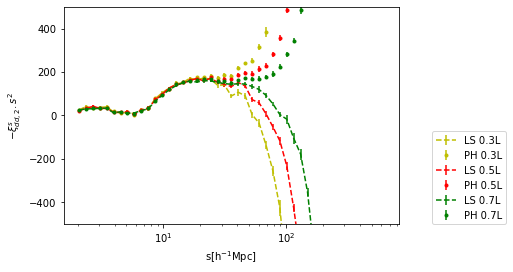

In [23]:
#LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, -xi_dd2s_03_LS*r**2, fmt ='y--',yerr = error_xi_dd2s_03_LS*r**2 ,label="LS 0.3L")
ax.errorbar(r, -xi_dd2s_03_PH*r**2, fmt ='y.',yerr = error_xi_dd2s_03_PH*r**2 ,label="PH 0.3L")
ax.errorbar(r, -xi_dd2s_05_LS*r**2, fmt ='r--',yerr = error_xi_dd2s_05_LS*r**2 ,label="LS 0.5L")
ax.errorbar(r, -xi_dd2s_05_PH*r**2, fmt ='r.',yerr = error_xi_dd2s_05_PH*r**2 ,label="PH 0.5L")
ax.errorbar(r, -xi_dd2s_07_LS*r**2, fmt ='g--',yerr = error_xi_dd2s_07_LS*r**2 ,label="LS 0.7L")
ax.errorbar(r, -xi_dd2s_07_PH*r**2, fmt ='g.',yerr = error_xi_dd2s_07_PH*r**2 ,label="PH 0.7L")
#ax.errorbar(r, -xi_dd2s_LS*r**2, fmt ='--',yerr = error_xi_dd2s_LS*r**2 ,label="LS non PBC")
#ax.errorbar(r, -xi_dd2s_pbc_LS*r**2, fmt ='-',yerr = error_xi_dd2s_pbc_LS*r**2  ,label="LS PBC")
ax.set_ylabel("$-\\xi_{dd,2}^s.s^2$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
ax.set_ylim(-500,500)
ax.legend(loc=(1.1,0))
#plt.savefig('dds2-cutbox-correct.pdf')
#plt.savefig('dds2-03.png')

In [13]:
#with Landy-Szalay estimator (DD-2DR+RR)/RR = (DD-2DR)/RR + 1
A_0_f = np.zeros((ndata,nbins))
A_2_f = np.zeros((ndata,nbins))
for i in range (0,ndata):

    #load results for 8 realizations
    DDsmu_PBC = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
    mu_PBC    = np.loadtxt(path+'/my-f-code/results/dds-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (2))

    # RR, DR pairs count
    RRs_PBC = np.loadtxt(path+'/my-f-code/results/RRs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
     
    DR = np.loadtxt(path+'/my-f-code/results/DRs-fullboxnew-PBC-realization'
                         +realizations[i]+'.txt', usecols = (0))
        
    xi0_PBC = np.zeros(nbins)
    xi2_PBC = np.zeros(nbins)
 
    for ii in range(0,nbins):
        RR_mus = RRs_PBC[ii]/nmu_bins
        for j in range ((ii)*nmu_bins,(ii+1)*nmu_bins):
            xi0_PBC[ii] += ((DDsmu_PBC[j]-2*DR[j])/RR_mus+1)*P0*delta_mu 
            xi2_PBC[ii] += ((DDsmu_PBC[j]-2*DR[j])/RR_mus+1)*delta_mu*P2(mu_PBC[j])
   
    #monopole    
    A_0_f[i] = xi0_PBC
   
    #quadrupole
    A_2_f[i] = xi2_PBC*(2*l2+1)

# calculate the average of 8 realizations and error bars, F code
xi_dd0s_pbc_LS = np.zeros(nbins)
xi_dd2s_pbc_LS = np.zeros(nbins)

for i in range(0,nbins):
    xi_dd0s_pbc_LS[i] = np.mean(A_0_f[0:ndata,i])
    xi_dd2s_pbc_LS[i] = np.mean(A_2_f[0:ndata,i])

error_xi_dd0s_pbc_LS = np.zeros(nbins)
error_xi_dd2s_pbc_LS = np.zeros(nbins)
for i in range(0,nbins):
    a0 = 0
    a2 = 0
    for j in range(0,ndata):
        a0 += (A_0_f[j,i] - xi_dd0s_pbc_LS[i])**2
        a2 += (A_2_f[j,i] - xi_dd2s_pbc_LS[i])**2
    error_xi_dd0s_pbc_LS[i] = np.sqrt(a0/((ndata-1)*ndata)) #standard error of the mean
    error_xi_dd2s_pbc_LS[i] = np.sqrt(a2/((ndata-1)*ndata))


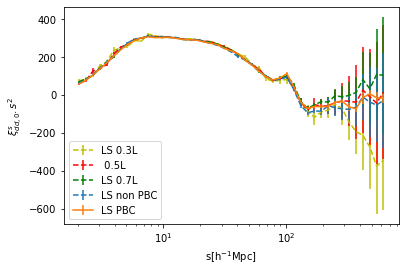

In [24]:
#plot LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, xi_dd0s_03_LS*r**2, fmt ='y--',yerr = error_xi_dd0s_03_LS*r**2 ,label="LS 0.3L")
ax.errorbar(r, xi_dd0s_05_LS*r**2, fmt ='r--',yerr = error_xi_dd0s_05_LS*r**2 ,label=" 0.5L")
ax.errorbar(r, xi_dd0s_07_LS*r**2, fmt ='g--',yerr = error_xi_dd0s_07_LS*r**2 ,label="LS 0.7L")
#ax.errorbar(r, xi_dd0s_07_PH*r**2, fmt ='y.',yerr = error_xi_dd0s_07_PH*r**2 ,label="PH 0.7L")
ax.errorbar(r, xi_dd0s_LS*r**2, fmt ='--',yerr = error_xi_dd0s_LS*r**2,label="LS non PBC")
#ax.errorbar(r, xi_dd0s_PH*r**2, fmt ='--',yerr = error_xi_dd0s_PH*r**2,label="PH non PBC")
ax.errorbar(r, xi_dd0s_pbc_LS*r**2,fmt ='-',yerr = error_xi_dd0s_pbc_LS*r**2,label="LS PBC")
ax.set_ylabel("$\\xi_{dd,0}^s.s^2$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
#ax.set_ylim(-1000,500)
ax.legend()#(loc=(1.1,0))
#plt.savefig('dds0-cutbox-correct.pdf')
#plt.savefig('dds0-05.png')

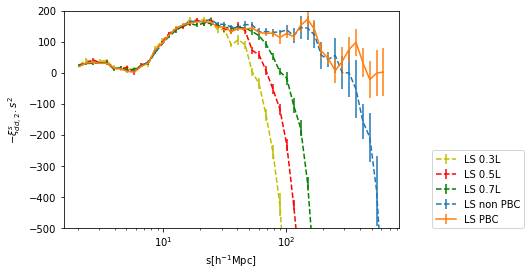

In [25]:
#LS estimator
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, -xi_dd2s_03_LS*r**2, fmt ='y--',yerr = error_xi_dd2s_03_LS*r**2 ,label="LS 0.3L")
ax.errorbar(r, -xi_dd2s_05_LS*r**2, fmt ='r--',yerr = error_xi_dd2s_05_LS*r**2 ,label="LS 0.5L")
ax.errorbar(r, -xi_dd2s_07_LS*r**2, fmt ='g--',yerr = error_xi_dd2s_07_LS*r**2 ,label="LS 0.7L")
#ax.errorbar(r, -xi_dd2s_07_PH*r**2, fmt ='y--',yerr = error_xi_dd2s_07_PH*r**2 ,label="PH 0.7L")
ax.errorbar(r, -xi_dd2s_LS*r**2, fmt ='--',yerr = error_xi_dd2s_LS*r**2 ,label="LS non PBC")
ax.errorbar(r, -xi_dd2s_pbc_LS*r**2, fmt ='-',yerr = error_xi_dd2s_pbc_LS*r**2  ,label="LS PBC")
ax.set_ylabel("$-\\xi_{dd,2}^s.s^2$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
ax.set_ylim(-500,200)
ax.legend(loc=(1.1,0))
#plt.savefig('dds2-cutbox-correct.pdf')
#plt.savefig('dds2-03.png')

plot with the cut off theoretical curves

In [15]:
# density auto-correlation in redshiftspace, theory, Fortran code 
xi_dd0_th = np.loadtxt(path+'/my-f-code/results/xi-dd0-th.txt', usecols=(1))
xi_dd0_th *= K0*b**2
xi_dd2_th = np.loadtxt(path+'/my-f-code/results/xi-dd2-th.txt', usecols=(1))
xi_dd2_th *= K2*b**2

# density auto-correlation cut-off in redshiftspace, theory, Fortran code 
xi_dd0_th_cut = np.loadtxt(path+'/my-f-code/results/xi-dd0-th-cut.txt', usecols=(1))
xi_dd0_th_cut *= K0*b**2
xi_dd2_th_cut = np.loadtxt(path+'/my-f-code/results/xi-dd2-th-cut.txt', usecols=(1))
xi_dd2_th_cut *= K2*b**2


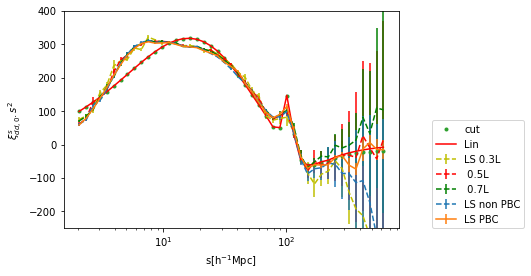

In [19]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, xi_dd0s_03_LS*r**2, fmt ='y--',yerr = error_xi_dd0s_03_LS*r**2 ,label="LS 0.3L")
ax.errorbar(r, xi_dd0s_05_LS*r**2, fmt ='r--',yerr = error_xi_dd0s_05_LS*r**2 ,label=" 0.5L")
ax.errorbar(r, xi_dd0s_07_LS*r**2, fmt ='g--',yerr = error_xi_dd0s_07_LS*r**2 ,label=" 0.7L")
ax.errorbar(r, xi_dd0s_LS*r**2, fmt ='--',yerr = error_xi_dd0s_LS*r**2,label="LS non PBC")
ax.errorbar(r, xi_dd0s_pbc_LS*r**2,fmt ='-',yerr = error_xi_dd0s_pbc_LS*r**2,label="LS PBC")
ax.plot(r, xi_dd0_th_cut*r**2,'.' ,label="cut")
ax.plot(r, xi_dd0_th*r**2,'r-' ,label="Lin")
ax.set_ylabel("$\\xi_{dd,0}^s.s^2$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
ax.set_ylim(-250,400)
ax.legend(loc=(1.1,0))
#plt.savefig('dds0-cutbox.pdf')
#plt.savefig('dds0-Lincut.png')

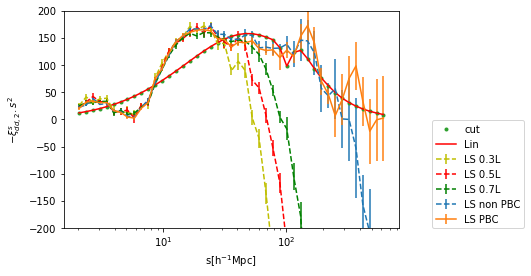

In [18]:
ax = plt.axes()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.errorbar(r, -xi_dd2s_03_LS*r**2, fmt ='y--',yerr = error_xi_dd2s_03_LS*r**2 ,label="LS 0.3L")
ax.errorbar(r, -xi_dd2s_05_LS*r**2, fmt ='r--',yerr = error_xi_dd2s_05_LS*r**2 ,label="LS 0.5L")
ax.errorbar(r, -xi_dd2s_07_LS*r**2, fmt ='g--',yerr = error_xi_dd2s_07_LS*r**2 ,label="LS 0.7L")
ax.errorbar(r, -xi_dd2s_LS*r**2, fmt ='--',yerr = error_xi_dd2s_LS*r**2 ,label="LS non PBC")
ax.errorbar(r, -xi_dd2s_pbc_LS*r**2, fmt ='-',yerr = error_xi_dd2s_pbc_LS*r**2  ,label="LS PBC")
ax.plot(r, -xi_dd2_th_cut*r**2,'.' ,label="cut")
ax.plot(r, -xi_dd2_th*r**2,'r-' ,label="Lin")
ax.set_ylabel("$-\\xi_{dd,2}^s.s^2$")
ax.set_xlabel("s[h$^{-1}$Mpc]")
#ax.set_xlim(1,100)
ax.set_ylim(-200,200)
ax.legend(loc=(1.1,0))
#plt.savefig('dds2-cutbox.pdf')
#plt.savefig('dds2-Lincut.png')